# Data Processing and Summarisation 

In [34]:
#import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Outliers

In [35]:
#load data into pandas data frame
cars = pd.read_csv('C:/Users/Nadia/Downloads/accord_sedan.csv')
cars.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


[Text(0.5, 1.0, 'Mileage')]

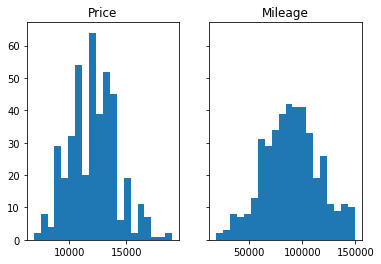

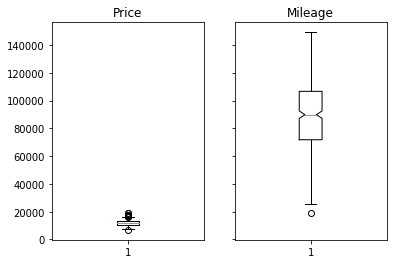

In [36]:
#plot suitable graph to show the distributions of price and mileage and to help visualise outliers
#plot a histogram to see distribution
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
ax1.hist(cars.price, 20)
ax1.set(title = 'Price')
ax2.hist(cars.mileage, 20)
ax2.set(title = "Mileage")

#plot boxplot to help indicate outliers
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
ax1.boxplot(cars.price,)
ax1.set(title = 'Price')
ax2.boxplot(cars.mileage, 20)
ax2.set(title = "Mileage")

Text(0, 0.5, 'Mileage')

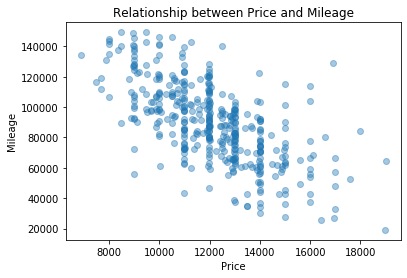

In [37]:
#scatter plot to show joint distribution
plt.scatter(cars.price, cars.mileage, alpha=0.4)
plt.title("Relationship between Price and Mileage")
plt.xlabel("Price")
plt.ylabel("Mileage")

In [38]:
#add two new columns to identify outliers
cars["isOutlierPrice"] = 0
cars["isOutlierMileage"] = 0

#calculating means and standard deviations
meanprice = cars['price'].mean()
stdprice = cars['price'].std()
meanmileage = cars['mileage'].mean()
stdmileage = cars['mileage'].std()

#filter values that are more than 2 standard deviations away from the mean
cars['isOutlierPrice'] = np.where(abs(cars['price']-cars['price'].mean()) < 2*cars['price'].std(), False, True)
cars['isOutlierMileage'] = np.where(abs(cars['mileage'] - cars['mileage'].mean()) < 2*cars['mileage'].std(), False, True)

Text(0, 0.5, 'Mileage')

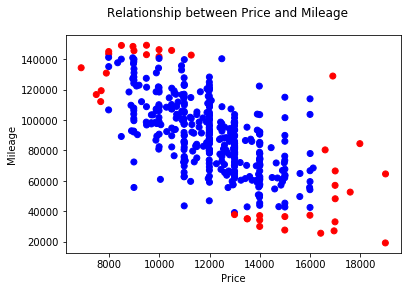

In [39]:
#visualise outliers on a plot
col = ['red' if i+j else 'blue' for i,j in zip(cars.isOutlierPrice, cars.isOutlierMileage)]
plt.scatter(cars.price, cars.mileage, color = col)
plt.xlabel('Price')
plt.suptitle('Relationship between Price and Mileage')
plt.ylabel('Mileage')

Q-Q Plots

In [40]:
#load data
tb = pd.read_csv('C:/Users/Nadia/Downloads/TB_burden_countries_2014-09-29.csv')

In [41]:
#fill missing data
missing = (pd.isnull(tb)).sum()
print(missing)
tb = tb.fillna(value=tb.mean())

country                        0
iso2                          23
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
e_pop_num                      0
e_prev_100k                   11
e_prev_100k_lo                11
e_prev_100k_hi                11
e_prev_num                    11
e_prev_num_lo                 11
e_prev_num_hi                 11
e_mort_exc_tbhiv_100k          1
e_mort_exc_tbhiv_100k_lo       1
e_mort_exc_tbhiv_100k_hi       1
e_mort_exc_tbhiv_num           1
e_mort_exc_tbhiv_num_lo        1
e_mort_exc_tbhiv_num_hi        1
source_mort                    1
e_inc_100k                     1
e_inc_100k_lo                  1
e_inc_100k_hi                  1
e_inc_num                      1
e_inc_num_lo                   1
e_inc_num_hi                   1
e_tbhiv_prct                1250
e_tbhiv_prct_lo             1446
e_tbhiv_prct_hi             1446
e_inc_tbhiv_100k            1306
e_inc_tbhi

In [42]:
#chose colun=mn and compare to a normal distribution
col1 = 'e_prev_100k'
col = np.array(tb[col1])

Text(0.5, 1.0, 'Q-Q Plot of e_prev_100k')

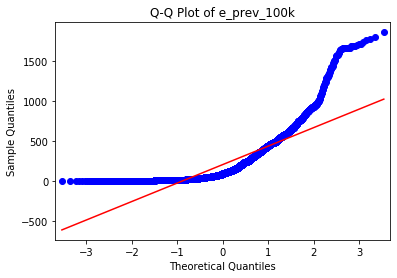

In [56]:
#create q-q plot and compare to a histogram
sm.qqplot(col, dist=stats.norm, line='r')
plt.title("Q-Q Plot of e_prev_100k")

(array([2452.,  692.,  444.,  326.,  277.,  233.,  156.,   84.,   70.,
          57.,   30.,   11.,    9.,   10.,    8.,    7.,   10.,   15.,
           8.,    4.]),
 array([2.600000e-01, 9.324700e+01, 1.862340e+02, 2.792210e+02,
        3.722080e+02, 4.651950e+02, 5.581820e+02, 6.511690e+02,
        7.441560e+02, 8.371430e+02, 9.301300e+02, 1.023117e+03,
        1.116104e+03, 1.209091e+03, 1.302078e+03, 1.395065e+03,
        1.488052e+03, 1.581039e+03, 1.674026e+03, 1.767013e+03,
        1.860000e+03]),
 <a list of 20 Patch objects>)

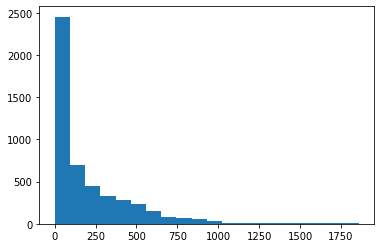

In [49]:
plt.hist(col,20)

Text(0.5, 1.0, 'Q-Q Plot of Log e_prev_100k')

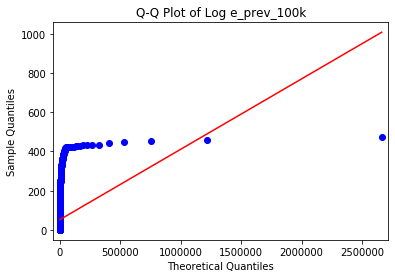

In [59]:
#try using a log q-q plot
sm.qqplot(col, dist=stats.lognorm, fit=True, line = 'r')
plt.title("Q-Q Plot of Log e_prev_100k")

Text(0.5, 1.0, 'histogram of log e_prev_100k')

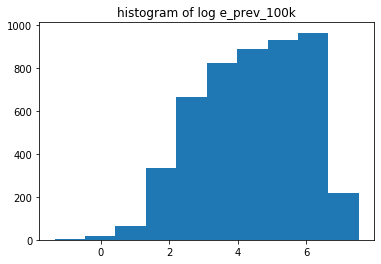

In [58]:
plt.hist(np.log(col))
plt.title('histogram of log e_prev_100k')

Distributions & Sampling Robust Statistics

In [63]:
#randomly sample from a normal distribution with varying sample sizes and varying standard deviations
s = [5, 10, 100]

#parameters
meanp =0
spreadp=0.5

#create an empty list to store means
means = []

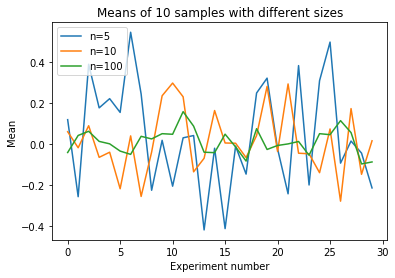

In [66]:
#for each sample size, add an empty list to store means, do 10 sampling means. Then sample value from distribution and put the mean into the means list
for i in range (len(s)):  
    means.append([])         
    for j in range (10):                
        sampled = np.random.normal(meanp, spreadp, s[i]) 
        means[i].append(np.mean(sampled))                       

#Plot the means
#create an empty list to store names, for each sample size plot the 10 means and add name
series=[] 
for i in range (len(s)):          
    plt.plot(means[i])         
    series.append("n="+str(s[i])) 

plt.legend(series, loc='upper left')    
plt.title("Means of 10 samples with different sizes")
plt.xlabel("Experiment number")
plt.ylabel("Mean")
plt.show()